In [1]:
import pickle
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns

import yaml 
import pprint
from termcolor import cprint

# hide warnigns for clarity
import warnings
warnings.filterwarnings('ignore')

from plotting_utils import *
setup_formatting()

In [2]:
def reset_colors(same=False): 
    if same:
        colors = {}
        for name in ['sac_orig','mppi','maxdiff']:
            colors[name] = iter(sns.color_palette('deep'))
    else:
        colors = {}
        colors['sac_orig'] = iter(sns.color_palette("Blues_r",n_colors=5))
        colors['mppi'] = iter(sns.color_palette("Greens_r",n_colors=5))
        colors['maxdiff'] = iter(sns.color_palette('rocket',n_colors=8))
    return colors


# plotting config

In [3]:
# path to data directory
path_dir = '../data/'
save_fig = False

save_dir = './pm_figs/'

mods = [['_H30_alpha5','_H30_alpha5','_H30_alpha5','_H30_alpha25']]
mods = mods + [['_H30']*4]  + [['_rew25']*4] 
methods =   ['maxdiff'] + ['mppi']  + ['sac_orig'] 
methods_labels = ['MaxDiff']+['NN-MPPI'] + ['SAC'] 
   
base_env = 'PointMass2D_DoubleIntEnv'
betas = ['_beta{:0.0e}'.format(pow(10,-x)).replace('+','').replace('-','_') for x in range(0,4,1)]
beta_labels = ['beta = {:0.0e}'.format(pow(10,-x)) for x in range(0,5,1)]

ylim = [-1500,0]

In [4]:
method = 'maxdiff'
method_idx = 0
# check config 
for idx, (mod, beta) in enumerate(zip(mods[method_idx],betas)):
    data_path = path_dir + '{}/{}/'.format(method, base_env + beta + mod)
    with open(data_path + 'seed_13/config.yaml') as f: 
        config = yaml.safe_load(f)
    cprint(beta[1:],'green')
    cprint(data_path,'blue')
    pprint.pprint(config['planner'])
    pprint.pprint(config['alpha_sequence'])
    print('\n')

beta1e00
../data/maxdiff/PointMass2D_DoubleIntEnv_beta1e00_H30_alpha5/
{'alpha': 0.5,
 'explr_dim': 'None',
 'horizon': 30,
 'lam': 0.5,
 'samples': 500,
 'weights': [1.0, 1.0, 0.01, 0.01],
 'window': False}
{'alpha': [5], 'steps': [1000]}


beta1e_01
../data/maxdiff/PointMass2D_DoubleIntEnv_beta1e_01_H30_alpha5/
{'alpha': 0.5,
 'explr_dim': 'None',
 'horizon': 30,
 'lam': 0.5,
 'samples': 500,
 'weights': [1.0, 1.0, 0.01, 0.01],
 'window': False}
{'alpha': [5], 'steps': [1000]}


beta1e_02
../data/maxdiff/PointMass2D_DoubleIntEnv_beta1e_02_H30_alpha5/
{'alpha': 0.5,
 'explr_dim': 'None',
 'horizon': 30,
 'lam': 0.5,
 'samples': 500,
 'weights': [1.0, 1.0, 0.01, 0.01],
 'window': False}
{'alpha': [5], 'steps': [1000]}


beta1e_03
../data/maxdiff/PointMass2D_DoubleIntEnv_beta1e_03_H30_alpha25/
{'alpha': 0.2,
 'explr_dim': 'None',
 'horizon': 30,
 'lam': 0.5,
 'samples': 500,
 'weights': [1.0, 1.0, 0.01, 0.01],
 'window': False}
{'alpha': [25], 'steps': [500]}




# horizontal combo figs

### by algorithm

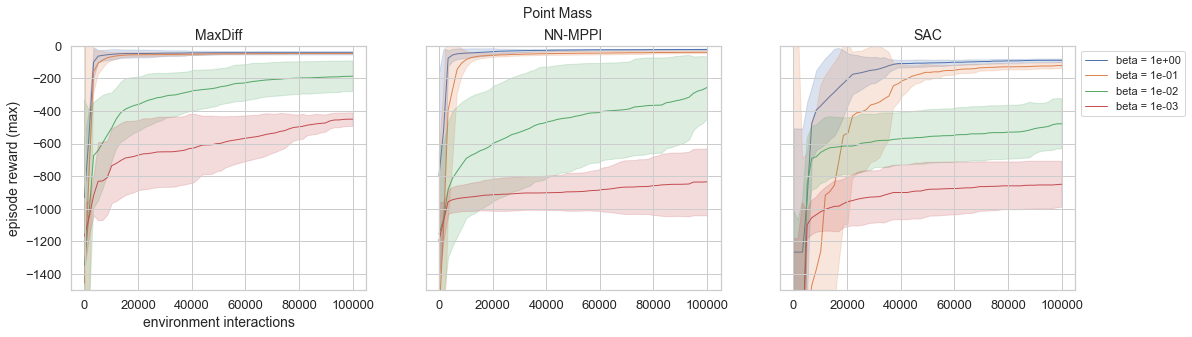

In [5]:
fill = True
plot_max = True
data_file = 'reward_data.pkl'

if len(methods) <= 5: 
    fig, axss = plt.subplots(1, len(methods),figsize=(6*len(methods),4.5),sharey=True,sharex=True)
else: 
    num_rows = int(np.ceil(len(methods)/5))
    num_cols = int(np.ceil(len(methods)/num_rows))
    fig, axss = plt.subplots(num_rows, num_cols,figsize=(6*num_cols,4.5*num_rows),sharey=True,sharex=True)
    axss = axss.flatten()
for idx, (method, mod_beta,method_label) in enumerate(zip(methods,mods,methods_labels)):
    colors = reset_colors(same=True)
    axs = axss[idx]
    for beta,lgd,mod in zip(betas,beta_labels,mod_beta):
        data_path = path_dir + '{}/{}/'.format(method, base_env + beta + mod)
        # print(data_path)
        data = process_data(data_path,get_max=plot_max, data_file=data_file,skip_early_stop=True)
        color = next(colors[method])
        plot_data(axs, data, lgd,color=color,fill=fill)
        axs.tick_params(axis='both', which='major')

plt.suptitle('Point Mass',y=1.0)
axss[0].set_xlabel('environment interactions')
axss[0].set_ylabel('episode reward ({})'.format('max' if plot_max else 'mean'))
for axs,title in zip(axss,methods_labels): 
    axs.set_title(title)
    # axs.set_ylim([-400,0])
    axs.set_ylim(ylim)
axss[-1].legend(bbox_to_anchor=(1.0,1.0), loc="upper left", ncol=1)

if save_fig:
    plt.savefig('{}pointmass_byAlg_{}.svg'.format(save_dir,'max' if plot_max else 'mean'), bbox_inches='tight')
plt.show()

### by beta

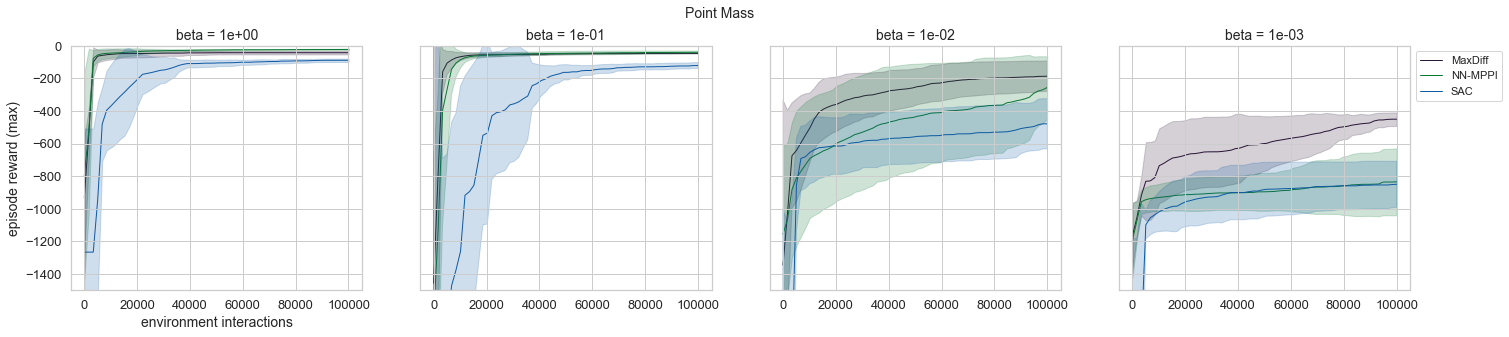

In [6]:
fig, axss = plt.subplots(1, len(betas),figsize=(6*len(betas),4.5),sharey=True,sharex=True)  
if len(betas)== 1: 
    axss = [axss]
for beta_idx,(axs,beta) in enumerate(zip(axss,betas)):  
    colors = reset_colors()
    for idx, (method, mod_beta, lgd) in enumerate(zip(methods,mods,methods_labels)):
        mod = mod_beta[beta_idx]
        data_path = path_dir + '{}/{}/'.format(method, base_env + beta + mod)
        data = process_data(data_path,get_max=plot_max, data_file=data_file,skip_early_stop=True)
        plot_data(axs, data, lgd,color=next(colors[method]),fill=fill)
        axs.tick_params(axis='both', which='major')

plt.suptitle('Point Mass',y=1.0)
axss[0].set_xlabel('environment interactions')
axss[0].set_ylabel('episode reward ({})'.format('max' if plot_max else 'mean'))
for axs,title in zip(axss,beta_labels): 
    axs.set_title(title)
    axs.set_ylim(ylim)
axss[-1].legend(bbox_to_anchor=(1.0,1.0), loc="upper left", ncol=1)

if save_fig:
    plt.savefig('{}pointmass_byBeta_{}.svg'.format(save_dir,'max' if plot_max else 'mean'), bbox_inches='tight')
plt.show()

# eval

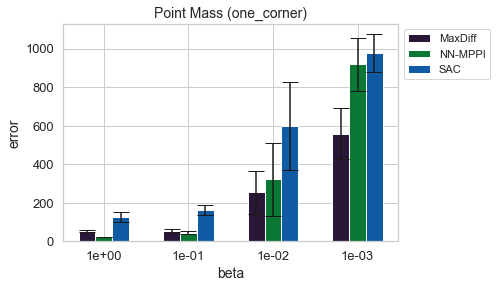

In [7]:
eval_method = 'one_corner'
data_file = f'{eval_method}_final_eval_reward_data.pkl'

fig, axs = plt.subplots(1, 1)
fig.subplots_adjust(hspace=0.1)  # adjust space between axes
for beta_idx,beta in enumerate(betas): 
    colors = reset_colors()
    for idx, (method, mod_beta, plt_lgd) in enumerate(zip(methods,mods,methods_labels)):
        mod = mod_beta[beta_idx]
        data_path =  f'{path_dir}/{method}/{base_env}{beta}{mod}/'
        data = process_eval_data(data_path,data_file=data_file)
        if method=='maxdiff' and beta_idx == 3:    
            tmp = f'{eval_method}_final_eval_reward_data_alpha20.pkl'
            data = process_eval_data(data_path,data_file=tmp)
        data['x'] = beta_idx + 0.2*(idx-1)
        label = plt_lgd if beta_idx == 3 else None
        axs.bar(data['x'], -data['mean'],yerr=data['std'],label=label,color=next(colors[method]),width=0.2,capsize=8)

axs.set_title(f'Point Mass ({eval_method})')
axs.set_ylabel('error')
axs.set_xlabel('beta')
axs.legend(bbox_to_anchor=(1.0,1.0), loc="upper left", ncol=1) # title="test | method "
plot_betas = np.char.mod('%1.0e', 10**(-np.arange(4,dtype=np.float)))
plt.xticks(ticks = range(4),labels=plot_betas)

if save_fig: 
    plt.savefig(f'{save_dir}Pointmass_eval_{eval_method}_flipped.svg', bbox_inches='tight')
plt.show()